# Problem Statement:

Now that this year's IPL auction is over, let's not curb our cricket love and start analyzing the whole of IPL with this latest and complete Indian Premier League dataset. It contains the ball by ball dataset. So, stop thinking and start analyzing.

Create clusters of IPL batsmen based on their strengths in order to show some of the best IPL batsmen of all time.


# Data Description:

id: Unique Match ID as per ESPNCricinfo.

inning: Inning Number.

over: Over Number.

ball: Ball Number.

batsman: Batsman on strike.

non_striker: Batsman at non-striker.

bowler: Bowler.

batsman_runs: Runs off bat.

extra_runs: Extra runs.

total_runs: Total Runs.

non_boundary: If there are overthrows.

is_wicket: Is the delivery a wicket?.

dismissal_kind: Type of dismissal.

player_dismissed: Player who got dismissed.

fielder: Fielder involved in the dismissal.

extras_type: Type of extras.

batting_team: Batting team.

bowling_team: Bowling team.

# Tasks/Activities List:

Read the IPL dataset.

Exploratory Data Analysis (EDA) - Show the Data quality check, treat the missing values, etc if any.

Analyze the data.

Generate all the relevant features to represent a batsman like total runs scored, strike rate, etc.

Apply all the different clustering algorithms on this batsmen dataset like Kmeans, DBSCAN and Hierarchical clustering algorithms.

Evaluate the clustering results using a performance metric.

Visualize the clustered dataset.


# Importing Essential Libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import date
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import matplotlib.cm as cm
import plotly.express as px

# Reading IPL dataset

In [42]:
ipl_data = pd.read_csv(r"C:\Users\muska\Downloads\IPL Ball-by-Ball 2008-2020.csv")

# Exploratory Data Analysis (EDA) 

In [6]:
ipl_data.head()

id  inning  over  ball      batsman  non_striker     bowler  \
0  335982       1     6     5   RT Ponting  BB McCullum  AA Noffke   
1  335982       1     6     6  BB McCullum   RT Ponting  AA Noffke   
2  335982       1     7     1  BB McCullum   RT Ponting     Z Khan   
3  335982       1     7     2  BB McCullum   RT Ponting     Z Khan   
4  335982       1     7     3   RT Ponting  BB McCullum     Z Khan   

   batsman_runs  extra_runs  total_runs  non_boundary  is_wicket  \
0             1           0           1             0          0   
1             1           0           1             0          0   
2             0           0           0             0          0   
3             1           0           1             0          0   
4             1           0           1             0          0   

  dismissal_kind player_dismissed fielder extras_type           batting_team  \
0            NaN              NaN     NaN         NaN  Kolkata Knight Riders   
1            NaN              NaN     NaN         NaN  Kolkata Knight Riders   
2            NaN              NaN     NaN         NaN  Kolkata Knight Riders   
3            NaN              NaN     NaN         NaN  Kolkata Knight Riders   
4            NaN              NaN     NaN         NaN  Kolkata Knight Riders   

                  bowling_team  
0  Royal Challengers Bangalore  
1  Royal Challengers Bangalore  
2  Royal Challengers Bangalore  
3  Royal Challengers Bangalore  
4  Royal Challengers Bangalore

In [7]:
ipl_data.shape

(193468, 18)

In [8]:
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [9]:
ipl_data.duplicated().sum()

1

In [43]:
ipl_data = ipl_data.drop_duplicates()

In [12]:
# Outlier Detection
numeric_cols = ipl_data.select_dtypes(include=['int64', 'float64']).columns
Q1 = ipl_data[numeric_cols].quantile(0.25)
Q3 = ipl_data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1


# Identify outliers 
outliers = (ipl_data[numeric_cols] < (Q1 - 1.5 * IQR)) | (ipl_data[numeric_cols] > (Q3 + 1.5 * IQR))
print(outliers)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



No Outliers are present

In [13]:
# Cheching missing values
missing_values = ipl_data.isnull().sum()/len(ipl_data)*100
missing_values

id                   0.000000
inning               0.000000
over                 0.000000
ball                 0.000000
batsman              0.000000
non_striker          0.000000
bowler               0.000000
batsman_runs         0.000000
extra_runs           0.000000
total_runs           0.000000
non_boundary         0.000000
is_wicket            0.000000
dismissal_kind      95.092186
player_dismissed    95.092186
fielder             96.493459
extras_type         94.710726
batting_team         0.000000
bowling_team         0.098725
dtype: float64

# Treating missing values

In [44]:
ipl_data = ipl_data.drop(['extras_type', 'fielder','player_dismissed','dismissal_kind'], axis=1)
ipl_data = ipl_data.dropna()

In [15]:
ipl_data.shape  

(193276, 14)

# Analyzing the data

In [45]:
from pandas_profiling import ProfileReport

# Generate a profile report for ipl_data
profile = ProfileReport(ipl_data)

# Show the profile report in Jupyter Notebook
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Generating relevant features to represent a batsman

In [17]:
# Calculate strike rate before aggregation
ipl_data['strike_rate'] = (ipl_data['batsman_runs'] / ipl_data['ball']) * 100

# Generate relevant features for batsmen
batsman_data = ipl_data.groupby('batsman').agg(
    total_runs=('batsman_runs', 'sum'),
    balls_faced=('ball', 'count'),
    centuries=('batsman_runs', lambda x: (x >= 100).sum()),
#     half_centuries=('batsman_runs', lambda x: ((x >= 50) & (x < 100)).sum()),
    strike_rate=('strike_rate', 'mean')  # Use mean instead of sum for strike rate
).reset_index()


In [14]:
batsman_data= pd.DataFrame(batsman_data)

In [15]:
batsman_data.head()

batsman  total_runs  balls_faced  centuries  strike_rate
0  A Ashish Reddy         280          196          0    53.406220
1      A Chandila           4            7          0    19.523810
2        A Chopra          53           75          0    23.155556
3     A Choudhary          25           20          0    46.750000
4     A Dananjaya           4            5          0    22.000000

In [16]:
batsman_data.shape

(537, 5)

In [17]:
batsman_data.head()

batsman  total_runs  balls_faced  centuries  strike_rate
0  A Ashish Reddy         280          196          0    53.406220
1      A Chandila           4            7          0    19.523810
2        A Chopra          53           75          0    23.155556
3     A Choudhary          25           20          0    46.750000
4     A Dananjaya           4            5          0    22.000000

In [19]:
from sklearn.preprocessing import StandardScaler

# Separating the numerical and categorical columns
def data_type(batsman_data):
    numerical_cols=[]
    categorical_cols=[]
    for i in batsman_data.columns:
        if batsman_data[i].dtype == 'int64' or batsman_data[i].dtype == 'float64':
            numerical_cols.append(i)
        else:
            categorical_cols.append(i)
    return numerical_cols , categorical_cols

numerical, categorical = data_type(batsman_data)

# Identifying binary columns and ignoring them for scaling
def binary_columns (df):
    binary_cols= []
    for col in df.select_dtypes(include = ['int','float']).columns:
        unique_values = df[col]
        if np.in1d(unique_values,[0,1]).all():
            binary_cols.append(col)
    return binary_cols
binary_cols = binary_columns(batsman_data)

# Remove binary columns from numerical columns
numerical = [i for i in numerical if i not in binary_cols]

# Scaling numerical columns using Standard Scaling (Z-score normalization)
scaler = StandardScaler()
batsman_data[numerical] = scaler.fit_transform(batsman_data[numerical])

# Encoding categorical columns using label encoding
def encoding(dataset, categorical):
    for i in categorical:
        dataset[i] = dataset[i].astype('category')
        dataset[i] = dataset[i].cat.codes
        
    return dataset

batsman_data = encoding(batsman_data, categorical)


In [81]:
batsman_data.head()

batsman  total_runs  balls_faced  centuries  strike_rate
0        0   -0.180096    -0.228418          0     0.961296
1        1   -0.478838    -0.491787          0    -1.164559
2        2   -0.425801    -0.397030          0    -0.936696
3        3   -0.456108    -0.473672          0     0.543670
4        4   -0.478838    -0.494574          0    -1.009198

# Dimensionality Reduction using PCA

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 
pca_data = pca.fit_transform(batsman_data)


In [21]:
pca_data= pd.DataFrame(pca_data)

In [22]:
pca_data.head()

0         1
0  268.000511  0.108986
1  266.999541 -1.070720
2  265.999629 -0.887137
3  265.000391 -0.391337
4  263.999620 -1.013268

In [23]:
pca_data.shape

(537, 2)

# Elbow Method

In [86]:
pip install yellowbrick


Note: you may need to restart the kernel to use updated packages.


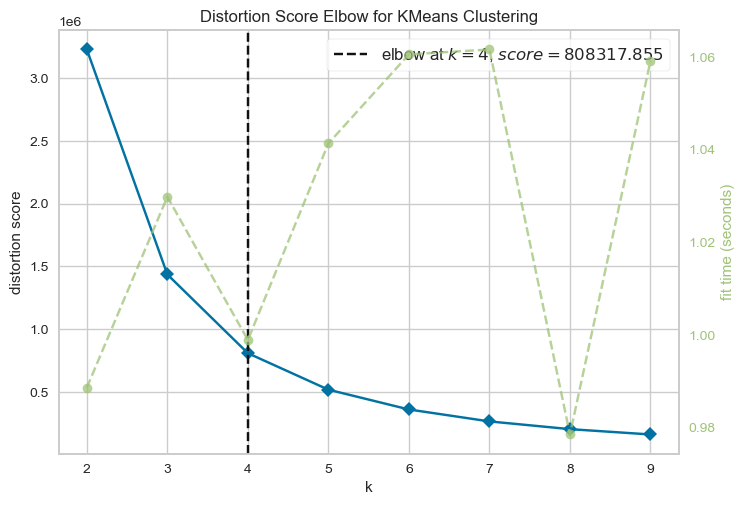

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [87]:
from yellowbrick.cluster import KElbowVisualizer

# Initialize KMeans clustering
kmeans = KMeans(random_state=42)

# Use the KElbowVisualizer to visualize the elbow method
visualizer = KElbowVisualizer(kmeans, k=(2, 10))  # Specify the range of k values to test
visualizer.fit(batsman_data)
visualizer.show()

# Apply clustering algorithms

# KMeans clustering

In [24]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(batsman_data)

# DBSCAN clustering

In [25]:
dbscan = DBSCAN(eps=0.5, min_samples=5, leaf_size=30, algorithm='auto',metric='euclidean',)
dbscan_labels = dbscan.fit_predict(batsman_data)

# Hierarchical clustering (Agglomerative Clustering)

In [27]:
agglomerative = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean',
                                       linkage = 'ward')

agglomerative_labels = agglomerative.fit_predict(batsman_data)

# Hyperparameter Tuning for DBSCAN

In [30]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.model_selection import GridSearchCV

# Define the DBSCAN model
dbscan = DBSCAN()

# Define the parameter grid for tuning
param_grid = {
    'eps': [0.1, 0.3, 0.5, 0.7, 1.0],
    'min_samples': [3, 5, 7, 10],
    'leaf_size': [10, 20, 30, 40],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}

# Define a custom scoring function for silhouette score
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Perform grid search cross-validation with custom silhouette scorer
grid_search = GridSearchCV(estimator=dbscan, param_grid=param_grid, scoring=silhouette_scorer, cv=5)
grid_search.fit(batsman_data)

# Get the best parameters
best_params = grid_search.best_params_

# Use the best parameters to create the final DBSCAN model
best_dbscan = DBSCAN(**best_params)

# Fit and predict using the best DBSCAN model
dbscan_labels = best_dbscan.fit_predict(batsman_data)

# Print the best parameters
print("Best Parameters:", best_params)


Best Parameters: {'algorithm': 'auto', 'eps': 1.0, 'leaf_size': 10, 'metric': 'chebyshev', 'min_samples': 3}


# Evaluate clustering results using silhouette score

In [31]:
from sklearn.metrics import silhouette_score

# Assuming kmeans_labels, dbscan_labels, and agglomerative_labels are already defined
silhouette_kmeans = silhouette_score(batsman_data, kmeans_labels)
silhouette_dbscan = silhouette_score(batsman_data, dbscan_labels)
silhouette_agglomerative = silhouette_score(batsman_data, agglomerative_labels)

print("Silhouette Score - KMeans:", silhouette_kmeans)
print("Silhouette Score - DBSCAN:", silhouette_dbscan)
print("Silhouette Score - Agglomerative:", silhouette_agglomerative)


Silhouette Score - KMeans: 0.587181207076276
Silhouette Score - DBSCAN: -0.33097189234438534
Silhouette Score - Agglomerative: 0.5280415407860092


In [32]:
# Check unique labels in each clustering result
print("Unique Labels - KMeans:", np.unique(kmeans_labels))
print("Unique Labels - DBSCAN:", np.unique(dbscan_labels))
print("Unique Labels - Agglomerative:", np.unique(agglomerative_labels))


Unique Labels - KMeans: [0 1 2]
Unique Labels - DBSCAN: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51]
Unique Labels - Agglomerative: [0 1 2]


# Visualize the clustered dataset

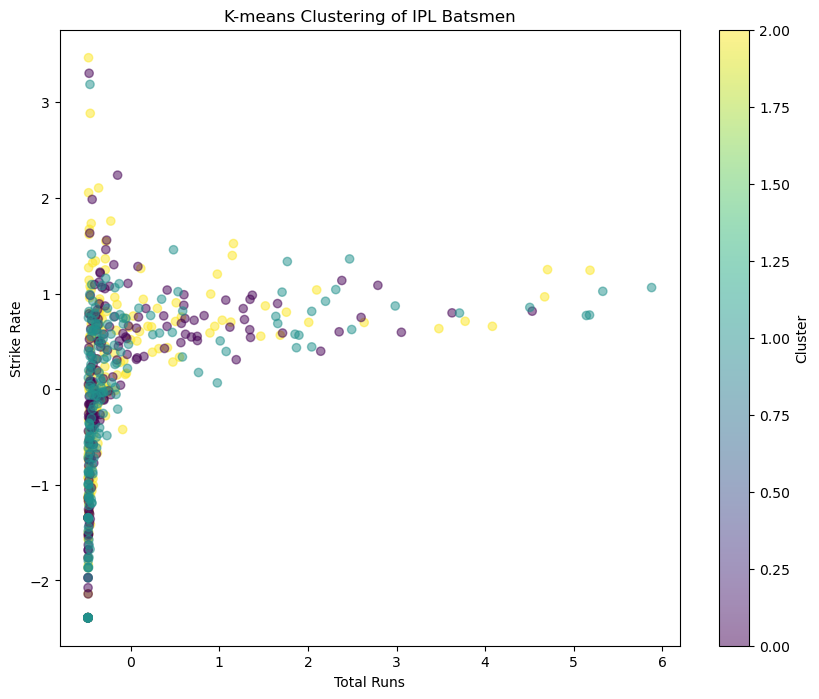

In [38]:
# Plotting scatter plot for K-means clustering
plt.figure(figsize=(10, 8))
plt.scatter(batsman_data['total_runs'],batsman_data['strike_rate'], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')
plt.xlabel('Total Runs')
plt.ylabel('Strike Rate')
plt.title('K-means Clustering of IPL Batsmen')
plt.show()

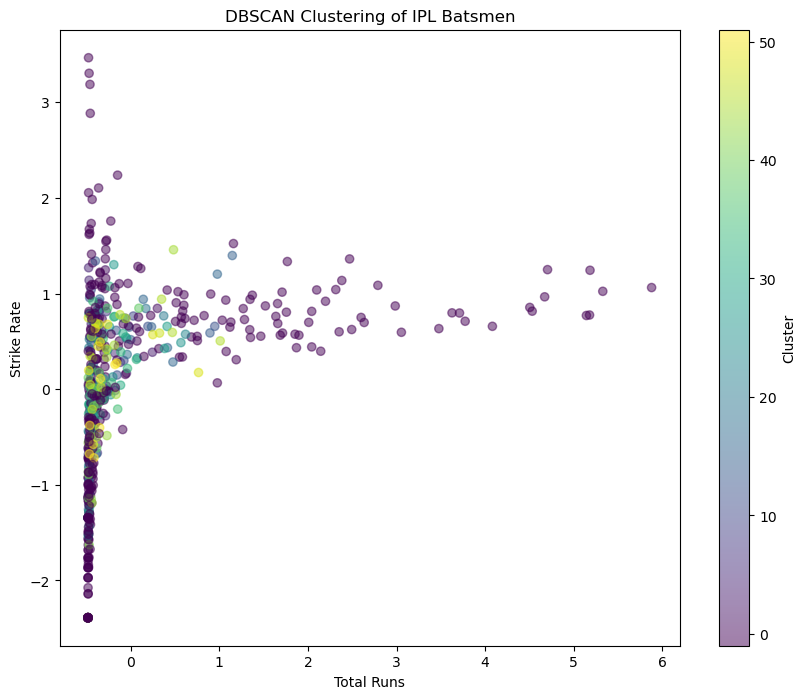

In [40]:
# Plotting scatter plot for DBCAN clustering

plt.figure(figsize=(10, 8))
plt.scatter(batsman_data['total_runs'],batsman_data['strike_rate'], c= dbscan_labels, cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')
plt.xlabel('Total Runs')
plt.ylabel('Strike Rate')
plt.title('DBSCAN Clustering of IPL Batsmen')
plt.show()

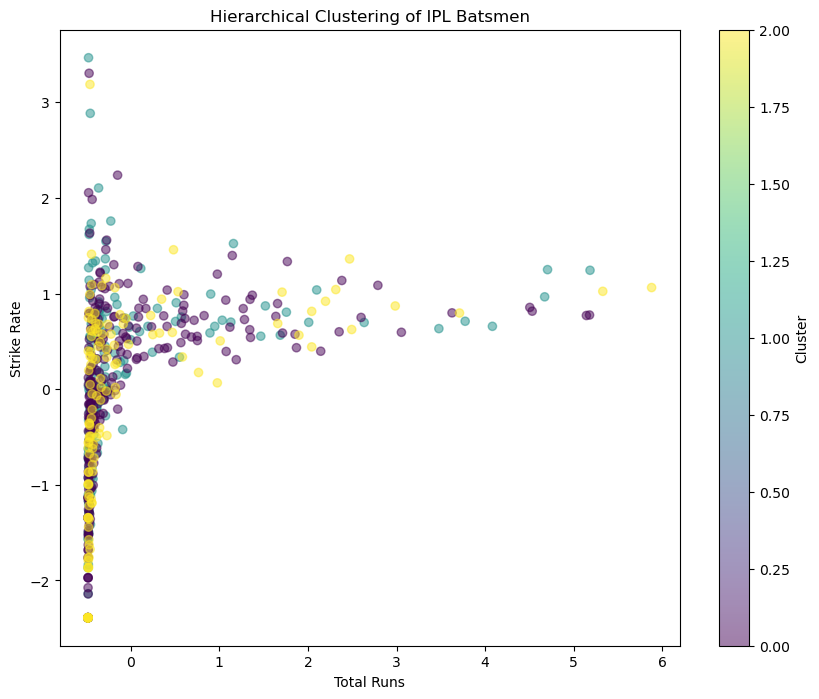

In [41]:
# Plotting scatter plot for Hierarchical clustering

plt.figure(figsize=(10, 8))
plt.scatter(batsman_data['total_runs'],batsman_data['strike_rate'], c=agglomerative_labels, cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')
plt.xlabel('Total Runs')
plt.ylabel('Strike Rate')
plt.title('Hierarchical Clustering of IPL Batsmen')
plt.show()